In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.metrics import Accuracy


"""
论文复现
标题：基于改进卷积神经网络的车牌识别方法
"""

# 关闭科学计数
np.set_printoptions(suppress=True)

# 训练集和测试集
# 58个类别 
# 55个图片
# 分辨率32*32
train = []
# 58个类别
label = []

# 初始化训练集
for i in range(34):
    data = np.load(f'.\chars74k-np\{i}.npy')
    train.append(data)
train = np.array(train).astype(int)

# 初始化标签
for i in range(34):
    data = np.load(f'.\chars74k-np\{i}_labels.npy')
    data = np.full_like(data,i)
    label.append(data)
label = np.array(label).astype(int)

# 测试集
test = train[28:,:]
test_label = label[28:,]

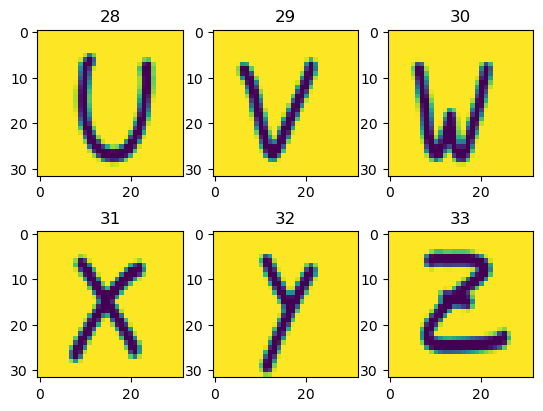

In [11]:
# 验证测试数据数据
for i in range(1, 7):
    plt.subplot(2,3,i)
    plt.imshow(test[i - 1][0])
    plt.title(f'{test_label[i - 1][0]}')

In [18]:
train = train.reshape(-1,32,32)
test = test.reshape(-1,32,32)
label = label.reshape(-1)
print('train:',train.shape,label.shape)
print('test:',test.shape,test_label.shape)

train: (1870, 32, 32) (1870,)
test: (330, 32, 32) (330,)


In [13]:
# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(96, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(120, (5,5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(34, activation='softmax')
])


model.compile(optimizer=tf.optimizers.Adam(0.003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(train, label, epochs=30)

Epoch 1/30
59/59 [==============================] - 2s 12ms/step - loss: 4.6711 - accuracy: 0.1059
Epoch 2/30
59/59 [==============================] - 1s 13ms/step - loss: 2.1589 - accuracy: 0.4021
Epoch 3/30
59/59 [==============================] - 1s 13ms/step - loss: 1.2538 - accuracy: 0.6449
Epoch 4/30
59/59 [==============================] - 1s 11ms/step - loss: 0.8234 - accuracy: 0.7540
Epoch 5/30
59/59 [==============================] - 1s 12ms/step - loss: 0.6119 - accuracy: 0.8193
Epoch 6/30
59/59 [==============================] - 1s 12ms/step - loss: 0.4346 - accuracy: 0.8631
Epoch 7/30
59/59 [==============================] - 1s 11ms/step - loss: 0.2940 - accuracy: 0.9000
Epoch 8/30
59/59 [==============================] - 1s 12ms/step - loss: 0.2123 - accuracy: 0.9257
Epoch 9/30
59/59 [==============================] - 2s 28ms/step - loss: 0.1936 - accuracy: 0.9449
Epoch 10/30
59/59 [==============================] - 1s 13ms/step - loss: 0.2262 - accuracy: 0.9283
Epoch 11/

In [29]:
# 评估模型
z = model.predict(test)
result = [np.argmax(i) for i in z]

acc =Accuracy()
acc.update_state(test_label,result)
print(f'识别率：{acc.result()}')

11/11 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.9757576>